/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


Text(0, 0.5, 'Fuerza [N]')

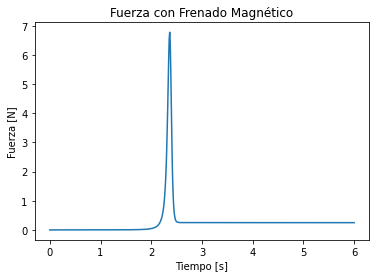

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#barra de progreso de porcentaje corrido del programa
from tqdm import tqdm_notebook


# In[29]:


#variables constantes

## Aceleración
grav = 24.8

# Masa del dipolo
m = 0.01

# es la permeabilidad máxima del MetGlass
mu = 1e6

# Permeabilidad del espacio libre
mu_0 = 4*np.pi*1e-7

# Radio del anillo de corriente
a = 0.12

# Resistividad 9e-5
R = 9e-5


# In[30]:


#Ahora calcula la constante $k$ la cual obtenemos con la siguiente expresión,
#$$k = \frac{9(\mu\mu_0)^2a^4}{4R}$$

#segmento de ecuacion 
k = (9* ((mu_0*mu)**2)*(a**4) )/(4*R)


# In[31]:


#Podemos también definir las funciones $p(z)$, $f(t,x,y)$ y $g(t,x,y)$ como se describieron en la sección anterior.

def p(z):
    z = (z**2)/ ( ( (z**2+ a**2)**5)**(1/2))
    return z
def f(x,y,t):
    return y

def g(x,y,t):
    g = -grav - (k/m) * p(x)*y
    return g


# In[32]:


# Tiempo inicial
t_0 = 0
# Timpo final
t_f = 6

# Altura Inicial z_0
x_0 = 67
# Velocidad Inicial z'_0
y_0 = 0

#Esta vez, en lugar de detenernos cuando lleguemos a algún valor, definiremos desde el principio una lista de tiempos $t$ de la siguiente manera.

# Paso horizontal
h = 0.01

# Número de pasos
# Calcula el número de pasos entre t_0 y t_f cuando tienes un paso horizontal de h
N = 600

# Arreglo con valores del tiempo:
# Usa np.linspace() para definir un arreglo que vaya de t_0 a t_n en N pasos
t = np.linspace(t_0, t_f, N)


# In[33]:


#Runge-Kutta
#Utilizando la descripción del método de Runge-Kutta de la sección anterior, podemos generar un ciclo que calcule los valores de $x_{n+1}$ y $y_{n+1}$ de manera iterativa.

all_xs = [] 

all_ys = []

# Usar los valores iniciales para el primer paso
x_n = x_0
y_n = y_0
t_n = t_0


# In[34]:


# Iterar para cada paso de la lista de tiempo t
# Usamos tqdm para generar una barra de progreso


for this_t in tqdm_notebook(t):
    
    k_1x = f(x_n,y_n, t_n)
    k_1y = g(x_n,y_n, t_n)

    k_2x = f(x_n + ((1/2)*h)*k_1x, y_n + ((1/2)*h*k_1y), t_n +(1/2)*h ) 
    k_2y = g(x_n + ((1/2)*h)*k_1x, y_n + ((1/2)*h*k_1y), t_n +(1/2)*h ) 

    k_3x = f(x_n + ((1/2)*h)*k_2x, y_n + ((1/2)*h*k_2y), t_n +(1/2)*h )  
    k_3y = g(x_n + ((1/2)*h)*k_2x, y_n + ((1/2)*h*k_2y), t_n +(1/2)*h )  

    k_4x = f(x_n + h*k_3x , y_n + (h*k_3y), t_n +h)
    k_4y = f(x_n + h*k_3x , y_n + (h*k_3y), t_n +h)
    
    x_n_plus1 = x_n + ((h/6)*( k_1x + 2*k_2x + 2*k_3x + k_4x))
    y_n_plus1 = y_n + ((h/6)*( k_1y + 2*k_2y + 2*k_3y + k_4y))
    
    x_n = x_n_plus1
    y_n = y_n_plus1

    all_xs.append(x_n_plus1)
    all_ys.append(y_n_plus1)
  
    # Para cada iteración debes calcular x_nplus1 y y_nplus1
    
    # No olvides guardar cada valor x_nplus1 y y_nplus1 calculado 
    # en las listas all_xs y all_ys
    
    # Tampoco olvides actualizar x_n y y_n para calcular algo nuevo 
    # en cada iteración


# In[36]:


#La posicion
x_new = np.array(all_xs) 


# In[37]:


#la velocidad
y_new = np.array(all_ys)


# In[40]:

#Fz es la fuerza que se opone al movimiento del carrito y esa es su fórmula

F_z = -k * p(x_new) * y_new


# In[41]:

plt.plot(t,F_z)
plt.title("Fuerza con Frenado Magnético")
plt.xlabel("Tiempo [s]")
plt.ylabel("Fuerza [N]")

